In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 

In [10]:
#Importing_data and EDA_Visualization:
df=pd.read_csv(r"C:\Users\Pratik\Downloads\Company_Data (1).csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [11]:
df1 = df.copy()


In [12]:
df1.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [13]:
df1.describe().T


,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [14]:
df1.isnull().sum()


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


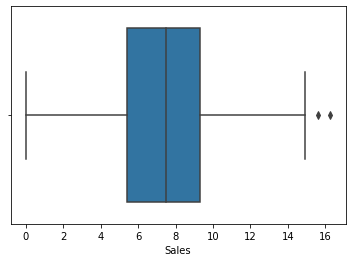

In [15]:
ax = sns.boxplot(df1['Sales'])


In [16]:
plt.rcParams["figure.figsize"] = 9,5


Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


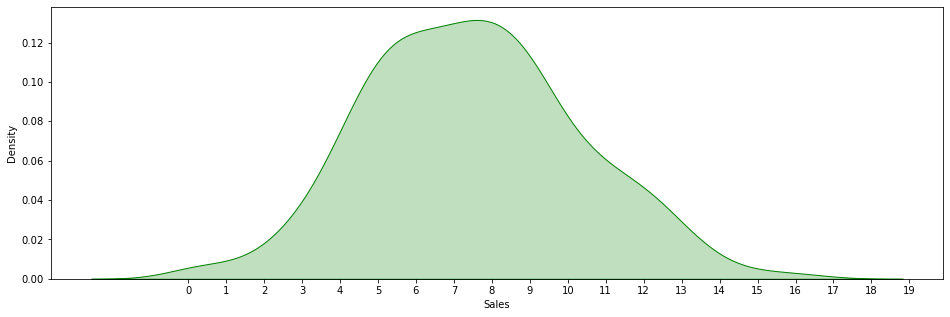

In [17]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [18]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()


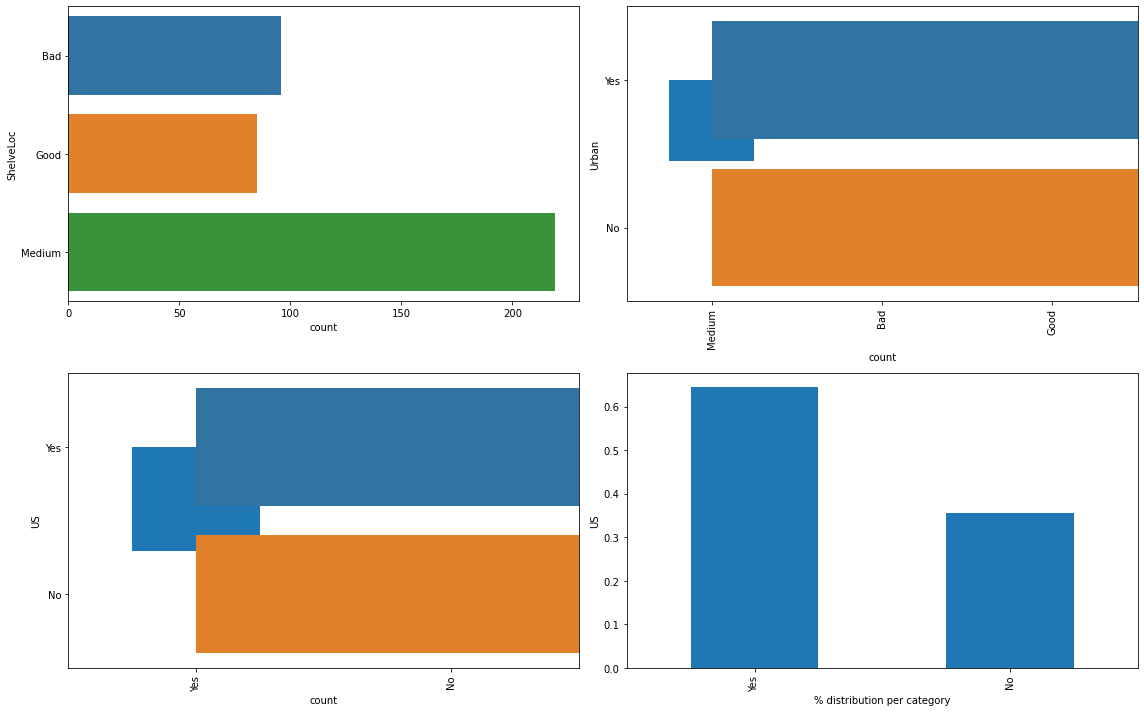

In [19]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [20]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()


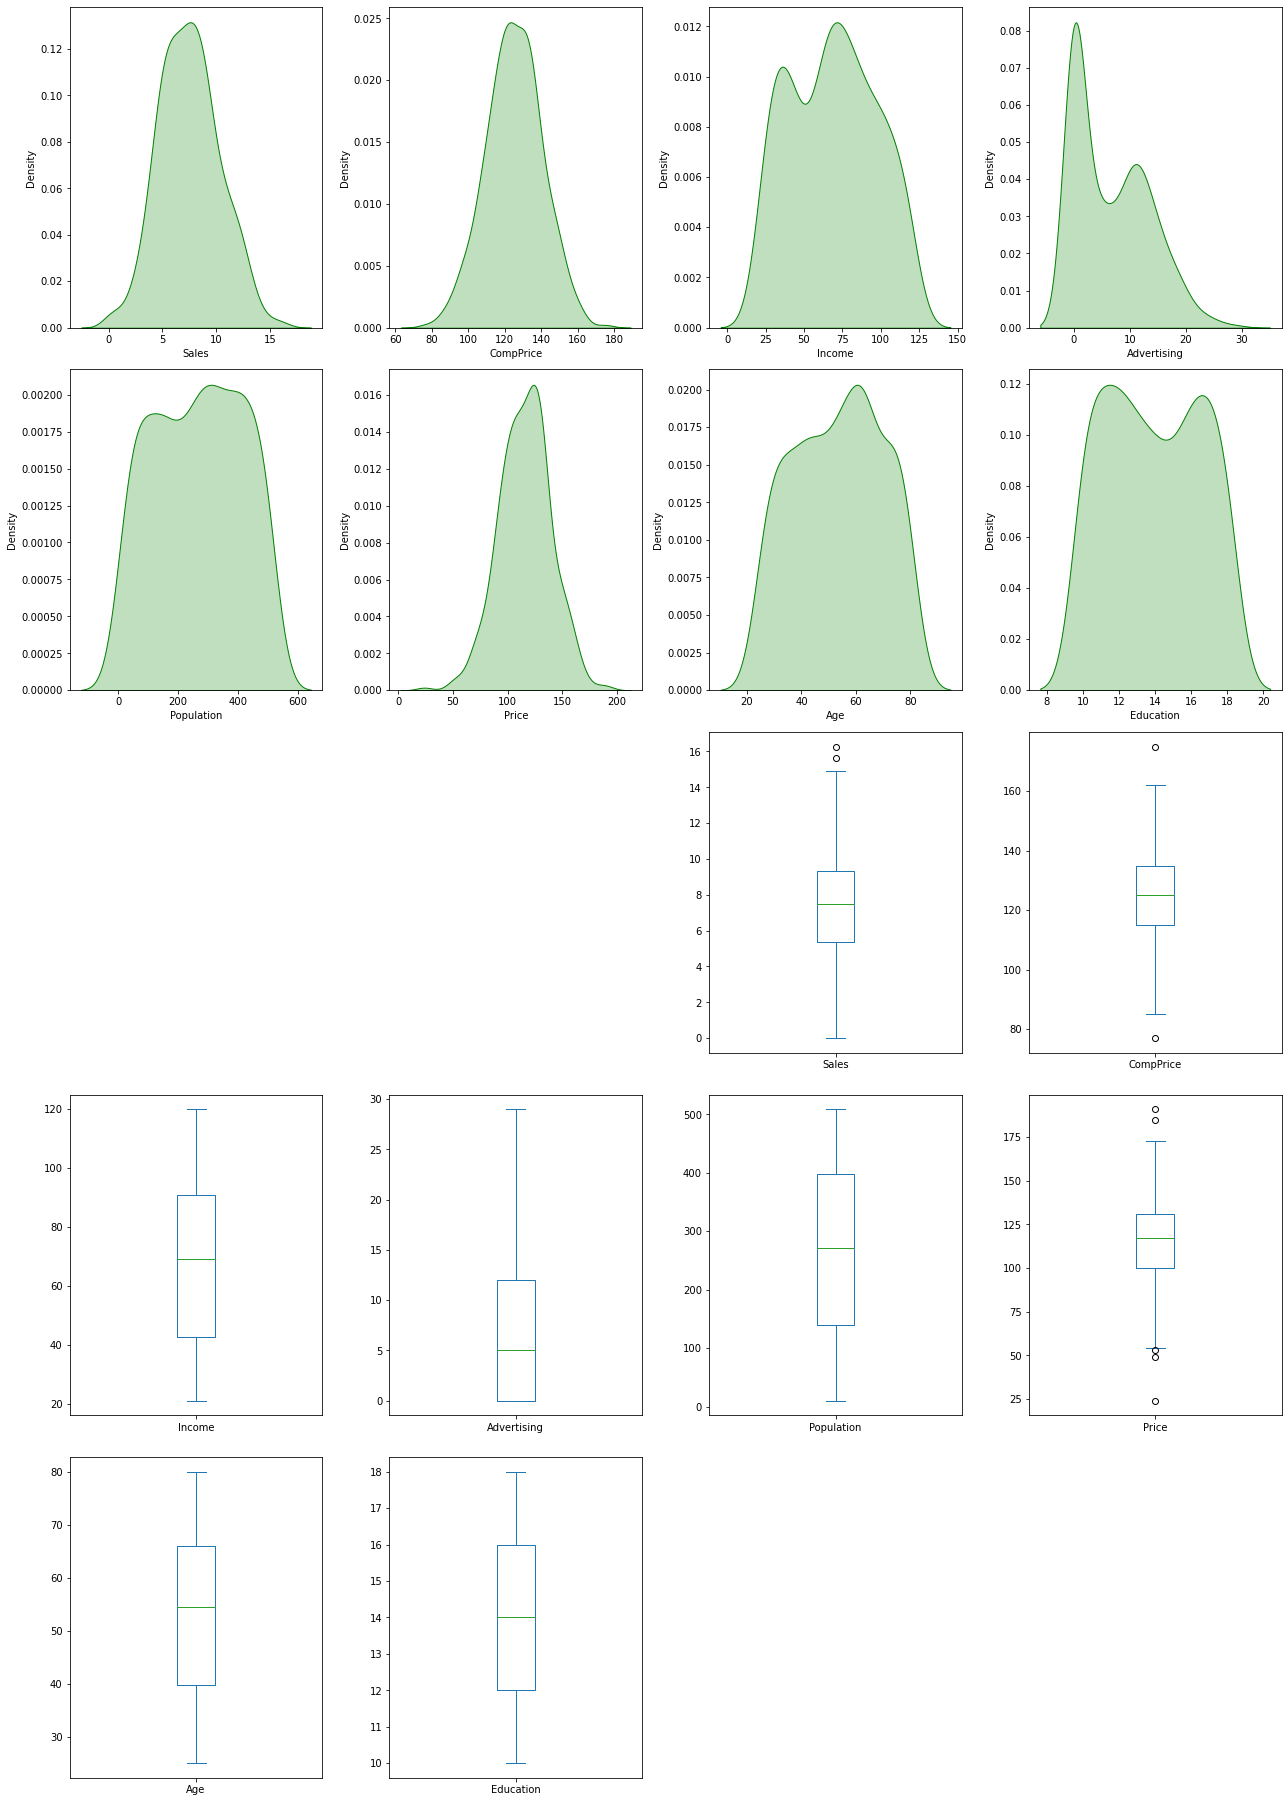

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [21]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [22]:
corr = df1.corr()


In [23]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])


In [25]:
corr = df1.corr()


<AxesSubplot:>

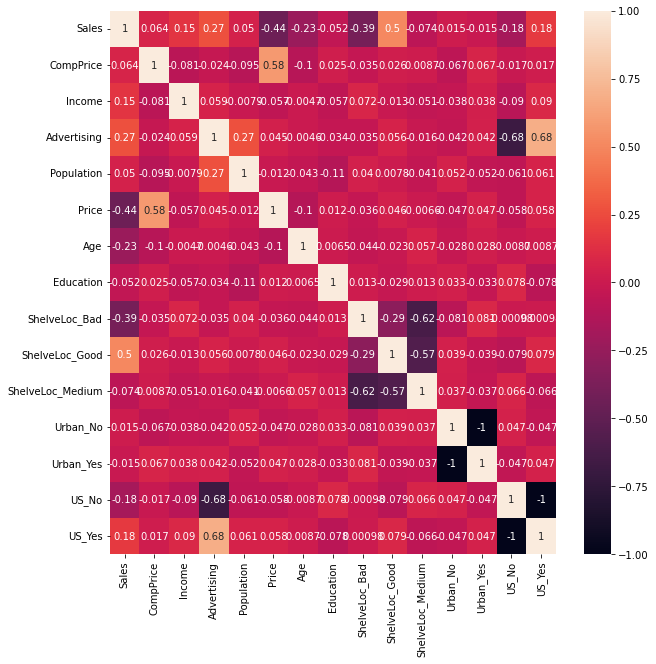

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Building _model and Predicting_Result
Since the target variable is continious, we create a class of the value based on the mean <= 7.49 == "Small" and > 7.49 == "large"

In [27]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [28]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [30]:
y_train.value_counts()


small    167
large    153
Name: sales, dtype: int64

In [31]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.809375

In [32]:
pred_train = model.predict(x_train)


In [33]:
accuracy_score(y_train,pred_train)


1.0

In [34]:
confusion_matrix(y_train,pred_train)


array([[153,   0],
       [  0, 167]], dtype=int64)

In [35]:
pred_test = model.predict(x_test)


In [36]:
accuracy_score(y_test,pred_test)


0.7375

In [37]:
confusion_matrix(y_test,pred_test)


array([[30, 16],
       [ 5, 29]], dtype=int64)

In [38]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})


In [39]:
df_t


,Actual,Predicted
260,large,large
231,large,small
16,large,large
60,large,large
212,large,large
...,...,...
146,small,small
343,small,small
83,small,small
94,large,large


In [40]:
cols = list(df1.columns)


In [41]:
predictors = cols[0:14]
target = cols[14]

In [42]:
tree1 = model.estimators_[20]


In [43]:
dot_data = StringIO()


In [44]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)


In [45]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [46]:
graph.write_png('company_full.png')


True

# Predicted_Result:
Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 76% As seen in the confusion matrix of Test data 61 instances are presdected correctly and 19 instances are not



In [47]:
rf_small = RF(n_estimators=10, max_depth = 3)


In [48]:
rf_small.fit(x_train,y_train)


RandomForestClassifier(max_depth=3, n_estimators=10)

In [49]:
rf_small.fit(x_train,y_train)


RandomForestClassifier(max_depth=3, n_estimators=10)

In [50]:
tree_small = rf_small.estimators_[5]


In [51]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)


In [52]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [53]:
graph.write_png('company_small.png')


True

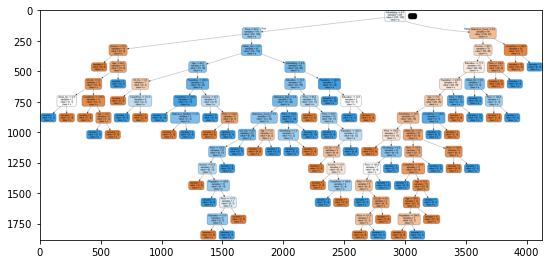

In [57]:
img = mpimg.imread(r"C:\Users\Pratik\Downloads\Assignments_Files\company_small.png")
plt.imshow(img)

In [58]:
model.feature_importances_


array([0.12214148, 0.09159128, 0.08637374, 0.08270171, 0.24552478,
       0.11255594, 0.06466522, 0.04834536, 0.07808353, 0.0234772 ,
       0.01140959, 0.01142931, 0.01147964, 0.01022121])

In [59]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [ ]:
#From the above table we can say that price is the most importtant feature from the column